<h1> Homework Set 6</h1>
Matt Buchovecky  
Astro 283 / Fitz 

In [40]:
import numpy as np
from scipy import optimize, special 
from matplotlib import pyplot 
from astropy.io import fits
%matplotlib inline

<h2> Problem 1

In [37]:
infile = open("./samplevals_PA.txt", 'r')
v_arr = [ ]

for line in iter(infile):
    line = line.split()
    try:
        float(line[0])
        v_arr.append(float(line[0]))
    except ValueError:
        continue
    
infile.close()


In [38]:
print(v_arr)

[3.268234568833195, 4.559128104426302, 9.952412352739938, 10.653534538036835, 5.838784012707487, 0.537382849676793, 7.700844168450949, 3.5868235601282272, 0.8893756846959922, 2.1763985114475304, 10.691842822083164, 8.391122773785431, 4.501693277379227, 2.622576726010284, 1.5392386446856254, 1.5437725138306102, 1.7699013063829039, 11.47863549609901, 5.125085938794893, 4.766521181897709, 0.9314251647394078, 6.176257938434682, 3.7687951140516374, 3.333455779322836, 4.433195145151503, 3.8722000665260325, 3.261930122936174, 7.579279779356263, 6.1002757807229635, 8.661302055006214, 11.053300867227067, 3.7037028069928812, 5.017700076928644, 8.181742162092064, 4.439296750219612, 3.6709851434633456, 9.373635083780874, 6.661202242753072, 18.255547975785536, 2.404939312768206, 4.613846612388805, 7.840872690360568, 1.467958348163112, 3.6470546198578258, 4.738737096390033, 6.022129175231994, 6.245327787763655, 7.194089565522965, 8.956268828916492, 8.431682218236459]


(array([  8.,  11.,  10.,   7.,   8.,   4.,   1.,   0.,   0.,   1.]),
 array([  0.53738285,   2.30919936,   4.08101587,   5.85283239,
          7.6246489 ,   9.39646541,  11.16828193,  12.94009844,
         14.71191495,  16.48373146,  18.25554798]),
 <a list of 10 Patch objects>)

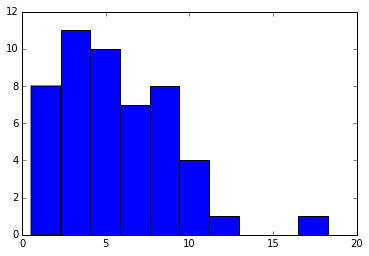

In [39]:
pyplot.hist(v_arr)

In [41]:
def Rice_dist(x, alpha, beta):
    """the pdf of the Rice distribution"""
    return (1/alpha)*np.exp((x+beta)/(-alpha))*special.iv(0, 2*np.sqrt(x*beta)/alpha)

In [50]:
def neg_likelihood(params, value_array, function):
    """the opposite of the likelihood function for a set of independent values for a given \\
    function"""
    l = -1
    for x in value_array:
        l *= function(x, *params)
    return l


In [56]:
guess = (2, 3)
opt = optimize.fmin(neg_likelihood, guess, args=(v_arr, Rice_dist))
print(opt)

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 40
         Function evaluations: 75
[ 1.12949817  4.50316054]


(array([ 0.0903028 ,  0.12416636,  0.11287851,  0.07901495,  0.0903028 ,
         0.0451514 ,  0.01128785,  0.        ,  0.        ,  0.01128785]),
 array([  0.53738285,   2.30919936,   4.08101587,   5.85283239,
          7.6246489 ,   9.39646541,  11.16828193,  12.94009844,
         14.71191495,  16.48373146,  18.25554798]),
 <a list of 10 Patch objects>)

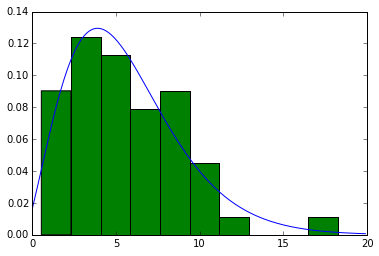

In [59]:
r = np.arange(0., 20., 0.1)
pyplot.plot(r, Rice_dist(r, opt[0], opt[1]))
pyplot.hist(v_arr, normed=True)


In [ ]:
alpha_range = np.linspace(0., 5., 100)
beta_range = np.linspace(0., 10., 100)
alpha_rav, beta_rav =


<h2> Problem 2 </h2>

Filename: hw6prob2_model.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   (128, 128, 128)   float64   
None
Filename: hw6prob2_psf.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (64, 64)     float64   
None


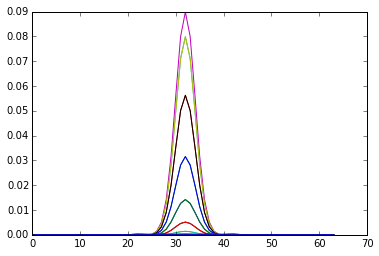

In [14]:
model_fits = fits.open("hw6prob2_model.fits")
psf_fits = fits.open("hw6prob2_psf.fits")
print(model_fits.info())
print(psf_fits.info())

model_data = model_fits[0].data
psf_data = psf_fits[0].data

model_fits.close()
psf_fits.close()


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


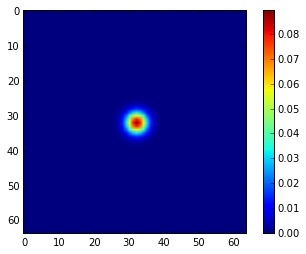

In [35]:
pyplot.imshow(psf_data)
pyplot.colorbar()

/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


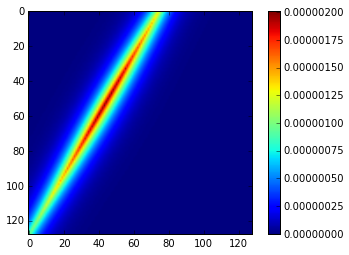

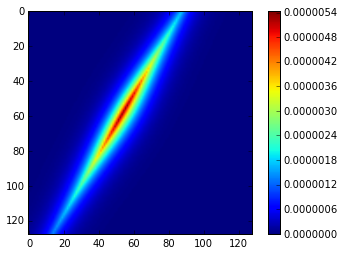

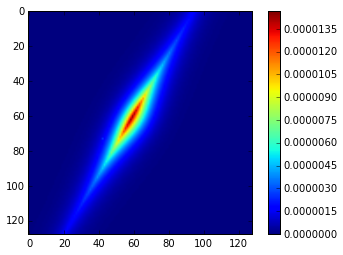

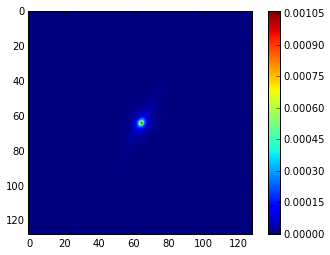

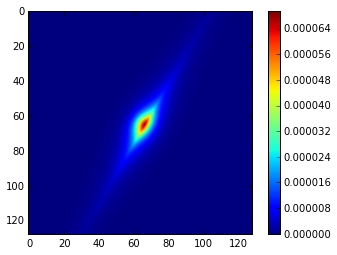

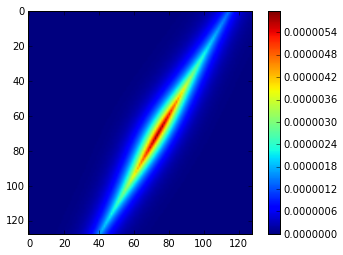

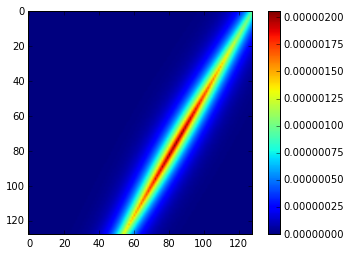

In [34]:
for s in (0, 31, 47, 63, 70, 95, 127):
    pyplot.figure()
    pyplot.imshow(model_data[:][s][:])
    pyplot.colorbar()

In [22]:
import mpl_toolkits


In [24]:
mpl_toolkits.mplot3d.Axes3D.contour(model_data)

AttributeError: module 'mpl_toolkits' has no attribute 'mplot3d'

In [27]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D.contour3D(model_data)

TypeError: contour() missing 3 required positional arguments: 'X', 'Y', and 'Z'